## Project : Classification

1. Explore the dataset provided
2. Create models to predict whether a client will subscribe to a term deposit.
3. Make predictions for the clients in the test set which you can submit in the solution_checker.xlsx file to generate accuracy score.

Importing the libraries that we will be using.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Checking the features present in our data and then look at their data types.

In [ ]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [ ]:
train.shape, test.shape

((23906, 18), (13564, 17))

There are 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. There are similar features in the test dataset as the train dataset except the subscribed. Now, to predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [ ]:
# Print data types for each variable
train.dtypes

ID              int64
age             int64
job            object
marital        object
education      object
default        object
balance       float64
housing        object
loan           object
contact        object
day           float64
month          object
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome       object
subscribed     object
dtype: object

There are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [ ]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933.0,no,no,telephone,19.0,nov,44.0,2.0,-1.0,0.0,unknown,no
1,40576,31,unknown,married,secondary,no,3.0,no,no,cellular,20.0,jul,91.0,2.0,-1.0,0.0,unknown,no
2,15320,27,services,married,secondary,no,891.0,yes,no,cellular,18.0,jul,240.0,1.0,-1.0,0.0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287.0,no,no,cellular,22.0,jun,867.0,1.0,84.0,3.0,success,yes
4,29842,31,technician,married,secondary,no,119.0,yes,no,cellular,4.0,feb,380.0,1.0,-1.0,0.0,unknown,no


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [ ]:
train['subscribed'].value_counts()

no     21096
yes     2809
Name: subscribed, dtype: int64

In [ ]:
# Normalize can be set to True to print proportions instead of number
train['subscribed'].value_counts(normalize=True)

no     0.882493
yes    0.117507
Name: subscribed, dtype: float64

<Axes: >

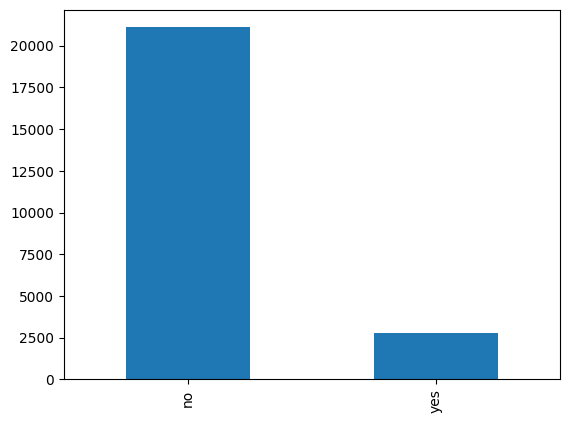

In [ ]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. Let's first explore the variables individually using univariate analysis, then look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

<Axes: xlabel='age', ylabel='Density'>

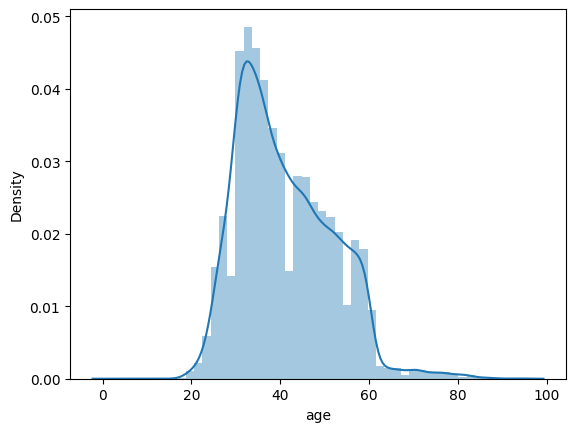

In [ ]:
sn.distplot(train["age"])

It can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

<Axes: >

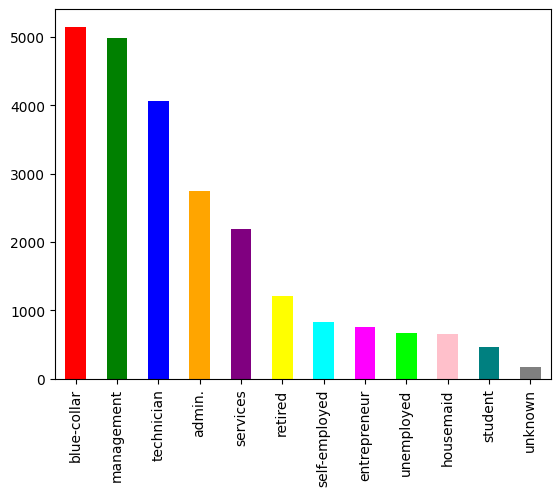

In [ ]:
# Define custom colors for the bar plot
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'gray']
train['job'].value_counts().plot.bar(color=colors)

Most of the clients belongs to red-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<Axes: >

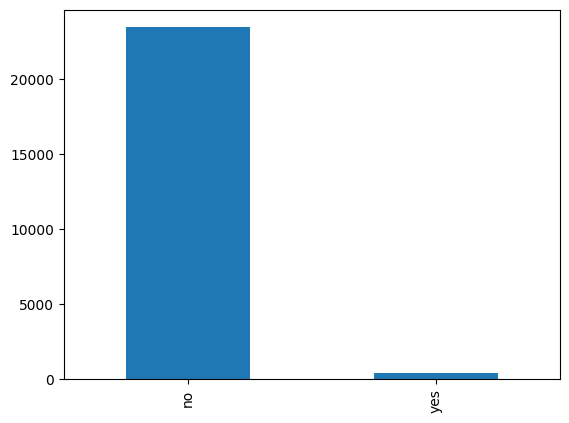

In [ ]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         2423  326
blue-collar    4787  365
entrepreneur    686   67
housemaid       601   61
management     4283  698
retired         917  292
self-employed   718  106
services       2006  183
student         330  139
technician     3612  459
unemployed      580   94
unknown         153   19


Text(0, 0.5, 'Percentage')

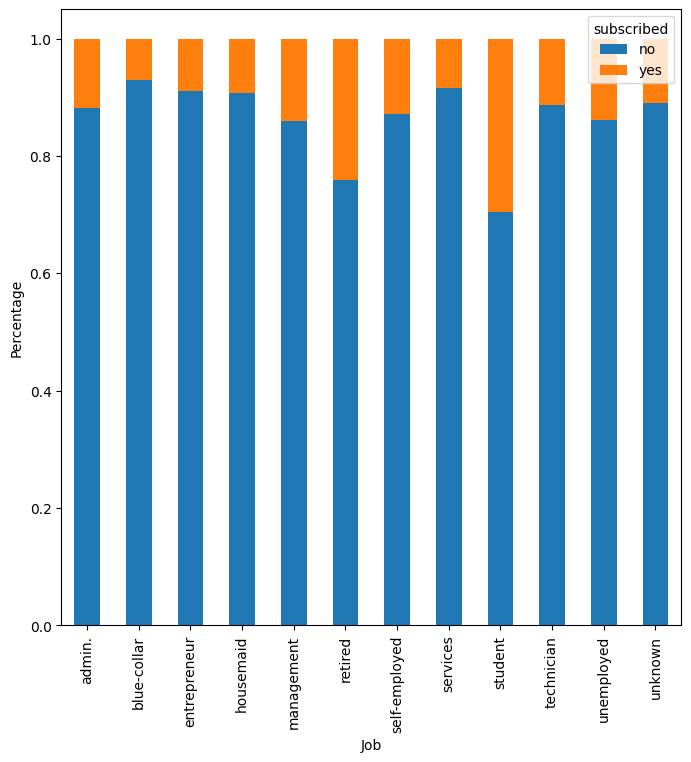

In [ ]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          20690  2776
yes           406    33


Text(0, 0.5, 'Percentage')

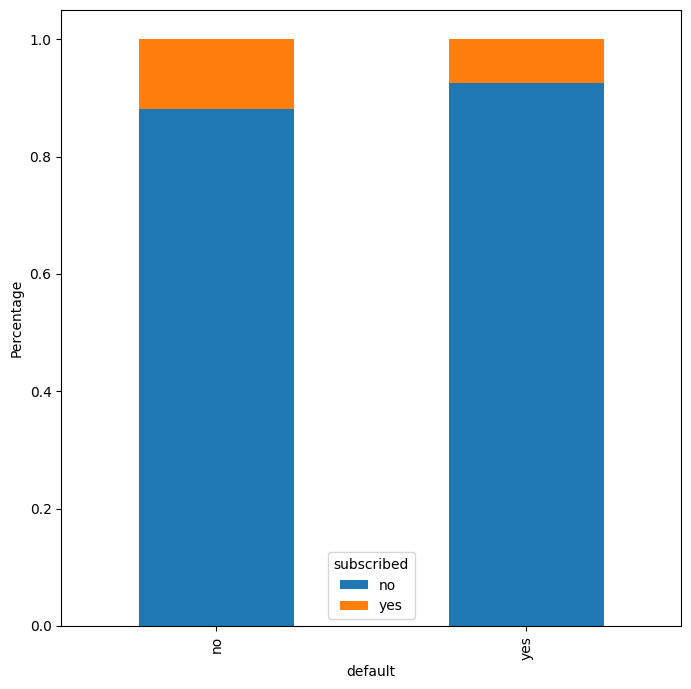

In [ ]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [ ]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<Axes: >

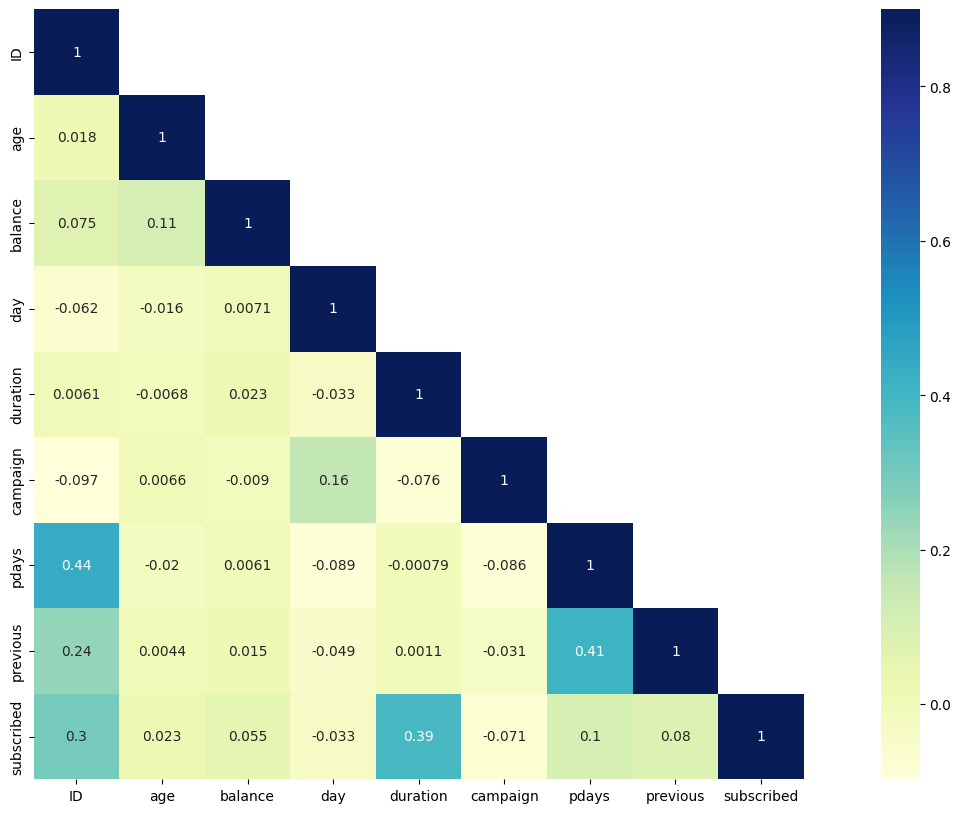

In [ ]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [24]:
train.shape

(23906, 18)

In [25]:
train.dropna(inplace=True)

In [26]:
train.shape

(23905, 18)

In [27]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [ ]:
target = train['subscribed']
# dropping the subscribe column
train = train.drop('subscribed',1)

In [30]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# defining the logistic regression model
lreg = LogisticRegression()

In [35]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [36]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8870529177996235

We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Let's try decision tree algorithm now to check if we get better accuracy with that.

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [41]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [42]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [43]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9079690441330266

We got an accuracy of more than 90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [44]:
test = pd.get_dummies(test)

In [45]:
test_prediction = clf.predict(test)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [46]:
submission = pd.DataFrame()

In [47]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [48]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [49]:
submission.to_csv('submission.csv', header=True, index=False)